In [5]:
import numpy as np 
import random 
import matplotlib.pyplot as plt 

In [6]:
def k_means(data, k):
    # random generate cluster_center 
    sample_num = data.shape[0]
    center_index = random.sample(range(sample_num), k)
    cluster_cen = data[center_index, :]

    is_change = 1
    cat = np.zeros(sample_num)

    while is_change:
        is_change = 0

        for i in range(sample_num):
            min_distance = 100000
            min_index = 0

            for j in range(k):
                sub_data = data[i, :] - cluster_cen[j, :]
                distance = np.inner(sub_data, sub_data)
                if distance < min_distance:
                    min_distance = distance
                    min_index = j + 1

            if cat[i] != min_index:
                is_change = 1
                cat[i] = min_index
        for j in range(k):
            cluster_cen[j] = np.mean(data[cat == (j + 1)], axis=0)

    return cat, cluster_cen

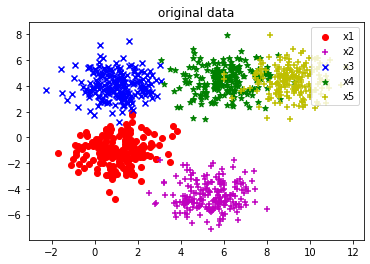

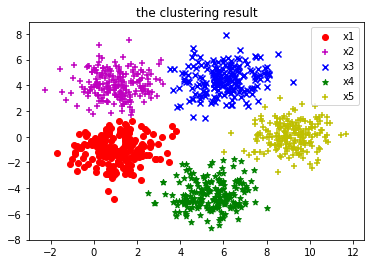

In [9]:
# generate data
cov = [[1, 0], [0, 1]]
mean1 = [1, -1]
x1 = np.random.multivariate_normal(mean1, cov, 200)

mean2 = [5.5, -4.5]
x2 = np.random.multivariate_normal(mean2, cov, 200)

mean3 = [1, 4]
x3 = np.random.multivariate_normal(mean3, cov, 200)

mean4 = [6, 4.5]
x4 = np.random.multivariate_normal(mean4, cov, 200)

mean5 = [9, 0.0]
x5 = np.random.multivariate_normal(mean5, cov, 200)

X = np.vstack((x1, x2, x3, x4, x5))

# data distribution
fig1 = plt.figure(1)
p1 = plt.scatter(x1[:, 0], x1[:, 1], marker='o', color='r', label='x1')
p2 = plt.scatter(x2[:, 0], x2[:, 1], marker='+', color='m', label='x2')
p3 = plt.scatter(x3[:, 0], x3[:, 1], marker='x', color='b', label='x3')
p4 = plt.scatter(x4[:, 0], x4[:, 1], marker='*', color='g', label='x4')
p5 = plt.scatter(x5[:, 0], x4[:, 1], marker='+', color='y', label='x5')
plt.title('original data')
plt.legend(loc='upper right')

cat, cluster_cen = k_means(X, 5)

fig2 = plt.figure(2)
for i, m, lo, label in zip(range(5), ['o', '+', 'x', '*', '+'], ['r', 'm', 'b', 'g', 'y'],
                           ['x1', 'x2', 'x3', 'x4', 'x5']):
    p = plt.scatter(X[cat == (i + 1), 0], X[cat == (i + 1), 1], marker=m, color=lo, label=label)
plt.legend(loc='upper right')
plt.title('the clustering result')
plt.show()
